In [1]:
import matplotlib.pyplot as plt
import numpy as np
from centrex_tlf.centrex_tlf_rust import (
    generate_uncoupled_hamiltonian_X_py,
    generate_coupled_hamiltonian_B_py,
    generate_transform_matrix_py,
    wigner_3j_py,
    wigner_6j_py,
)

from centrex_tlf import constants, hamiltonian, states


In [2]:
QN = states.generate_uncoupled_states_ground(Js=[0, 1, 2, 3, 4, 5, 6])

In [3]:
%%time
HX_python = hamiltonian.generate_uncoupled_hamiltonian_X(QN)

CPU times: total: 15.6 ms
Wall time: 5.58 ms


In [4]:
%%time
HX_rust = generate_uncoupled_hamiltonian_X_py(QN, constants.XConstants())

CPU times: total: 0 ns
Wall time: 6.02 ms


0.0
0.0
0.0
0.0
0.0
0.0
0.0


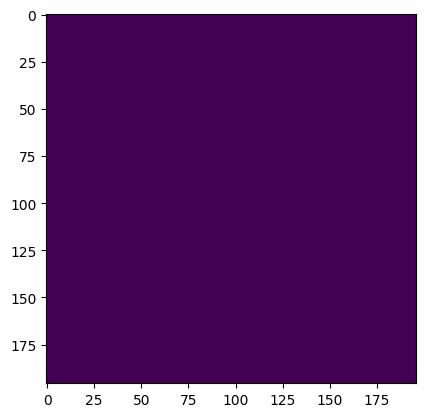

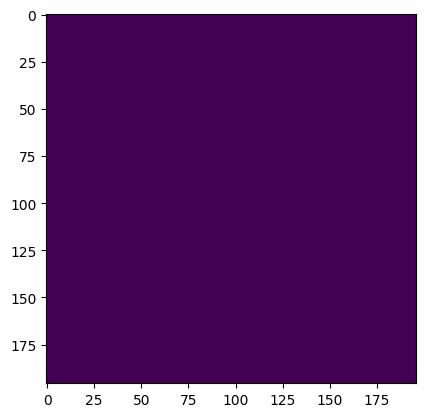

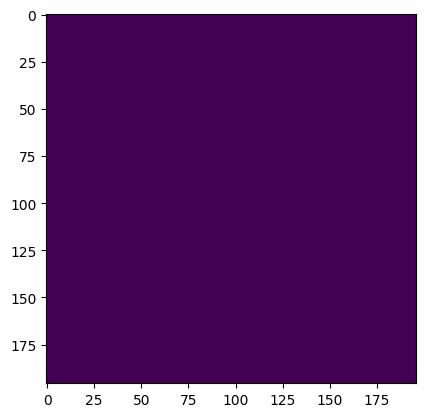

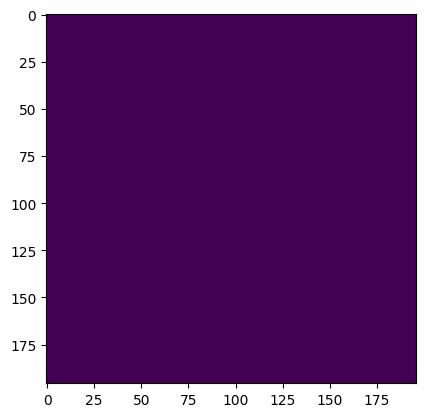

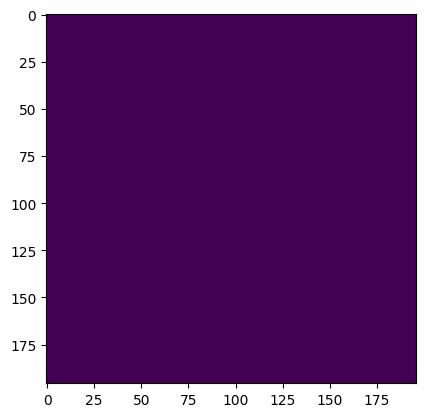

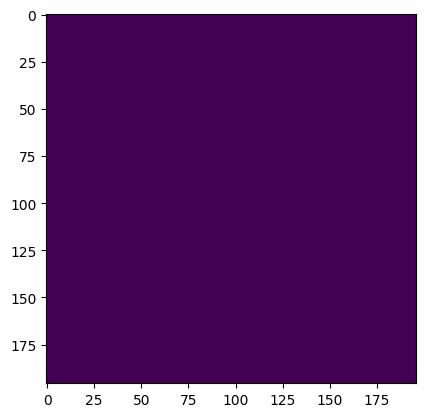

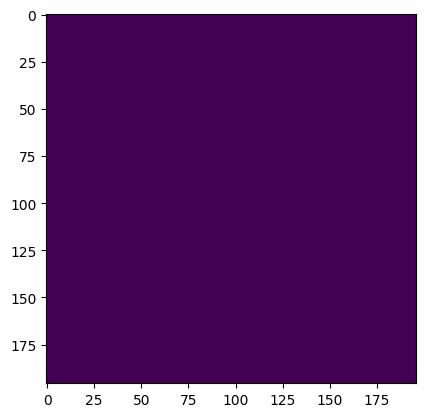

In [5]:
for attr in HX_rust.__dataclass_fields__.keys():
    fig, ax = plt.subplots()

    ax.imshow(np.abs((getattr(HX_rust, attr)) - getattr(HX_python, attr)))

    print((np.abs((getattr(HX_rust, attr))) - np.abs(getattr(HX_python, attr))).sum())

C:\Users\ogras\AppData\Local\Temp\ipykernel_76836\1181592019.py:2: RuntimeWarning: invalid value encountered in divide
  ax.imshow(np.abs(HX_rust.Hff - HX_python.Hff) / np.abs(HX_python.Hff))


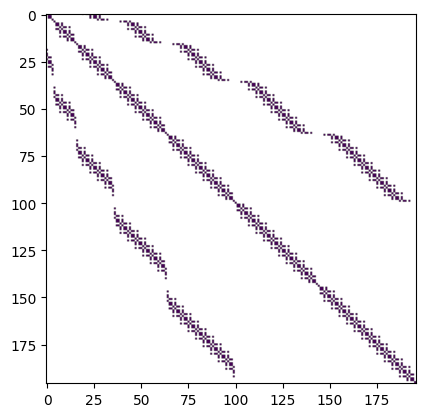

In [6]:
fig, ax = plt.subplots()
ax.imshow(np.abs(HX_rust.Hff - HX_python.Hff) / np.abs(HX_python.Hff))

In [7]:
%%timeit
HX_python = hamiltonian.generate_uncoupled_hamiltonian_X(QN)

4.51 ms ± 146 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
cst = constants.XConstants()

In [9]:
%%timeit
HX_rust = generate_uncoupled_hamiltonian_X_py(QN, cst)

4.36 ms ± 12.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
qn_select = states.QuantumSelector(
    J=[1, 2, 3, 4, 5, 6, 7], electronic=states.ElectronicState.B
)
QN_B = states.generate_coupled_states_B(qn_select)

In [11]:
cst_B = constants.BConstants()
HB_rust = generate_coupled_hamiltonian_B_py(QN_B, cst_B)

In [12]:
HB_python = hamiltonian.generate_coupled_hamiltonian_B(QN_B, cst_B)

Hrot = 0.00e+00
H_mhf_Tl = 0.00e+00
H_mhf_F = 0.00e+00
H_LD = 0.00e+00
H_cp1_Tl = 0.00e+00
H_c_Tl = 0.00e+00
HSx = 0.00e+00
HSy = 0.00e+00
HSz = 0.00e+00
HZx = 0.00e+00
HZy = 0.00e+00
HZz = 0.00e+00


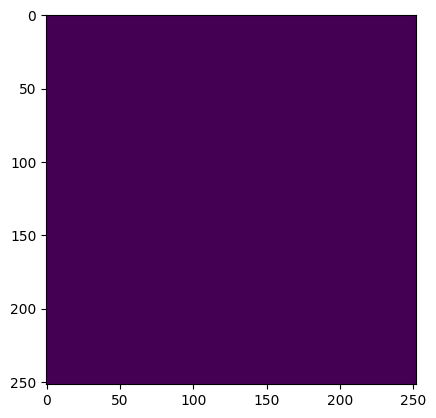

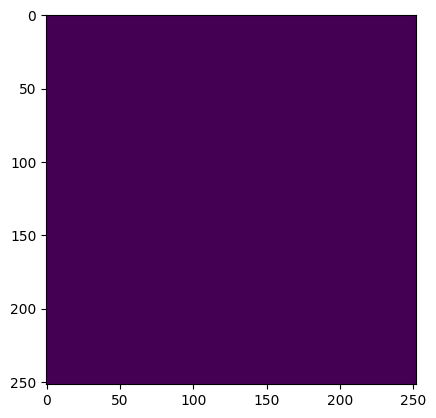

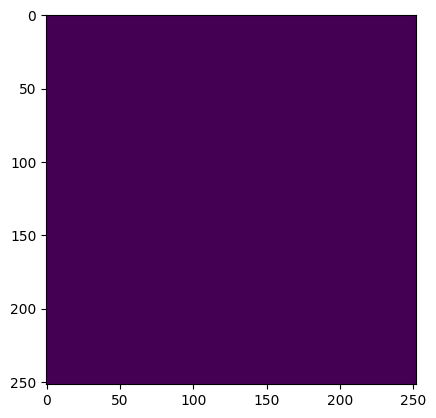

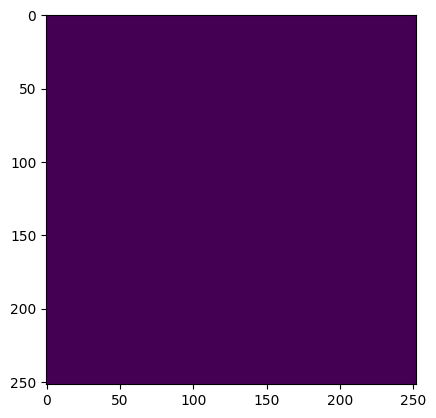

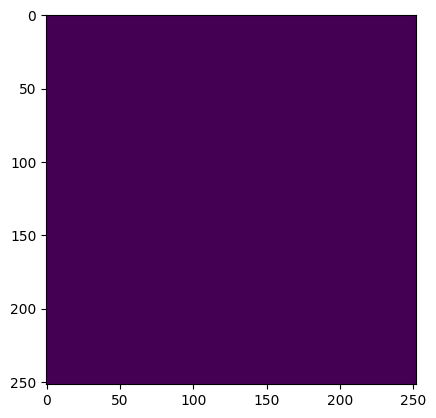

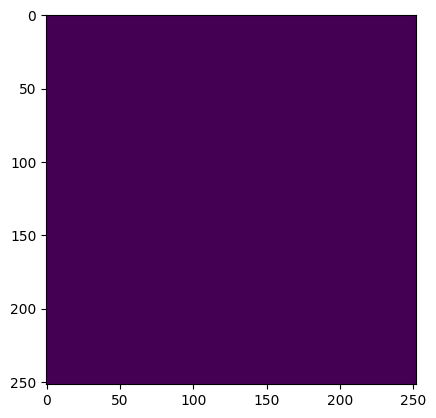

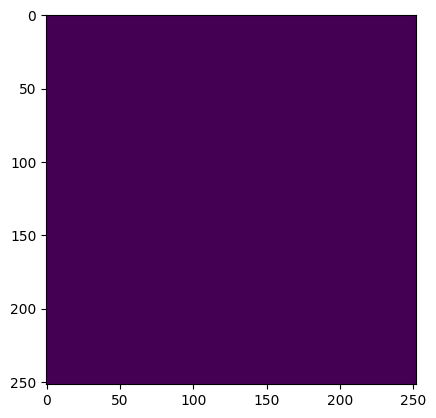

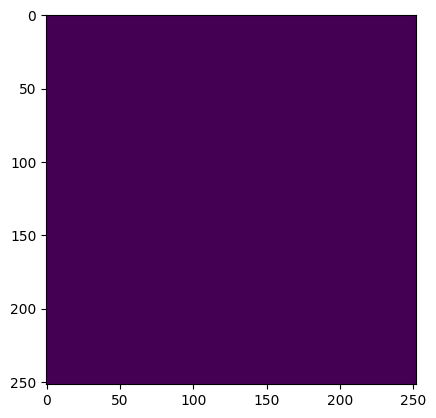

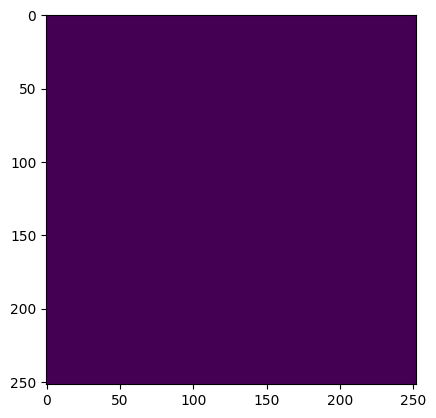

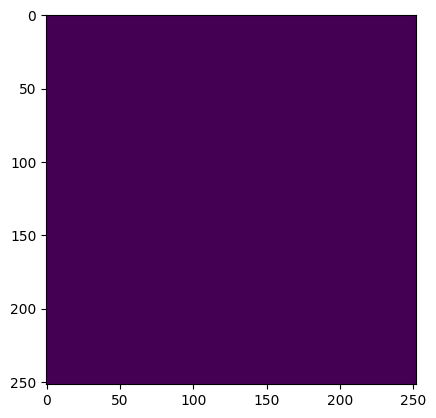

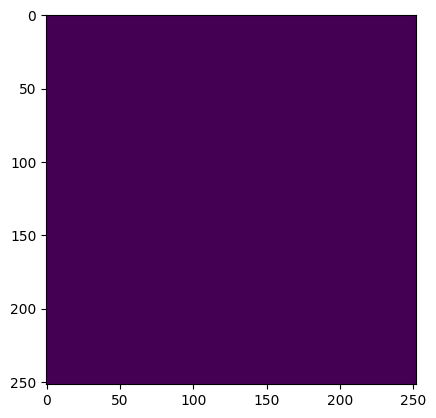

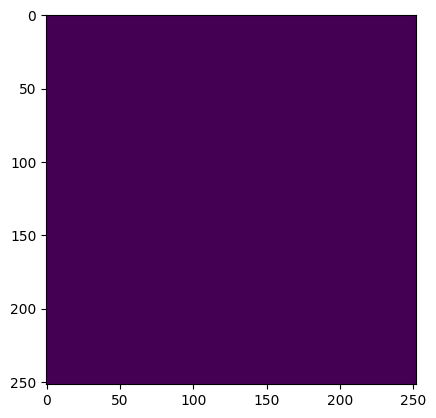

In [13]:
for attr in HB_rust.__dataclass_fields__.keys():
    fig, ax = plt.subplots()

    ax.imshow(np.abs((getattr(HB_rust, attr)) - (getattr(HB_python, attr))))
    print(
        f"{attr} = {(np.abs((getattr(HB_rust, attr))) - np.abs(getattr(HB_python, attr))).sum():.2e}"
    )


In [14]:
%%timeit
HB_python = hamiltonian.generate_coupled_hamiltonian_B(QN_B, cst_B)

13.7 ms ± 463 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
%%timeit
HB_rust = generate_coupled_hamiltonian_B_py(QN_B, cst_B)

13.5 ms ± 171 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
QN = states.generate_uncoupled_states_ground(Js=[0, 1, 2, 3])
QNc = states.generate_coupled_states_ground(Js=np.arange(QN[0].J, QN[-1].J + 1))

In [17]:
transform_python = hamiltonian.basis_transformations._generate_transform_matrix_python(
    QN, QNc
)

In [18]:
transform_rust = generate_transform_matrix_py(QN, QNc)

In [19]:
np.nanmax(np.abs(((transform_rust - transform_python) / transform_python)))

C:\Users\ogras\AppData\Local\Temp\ipykernel_76836\2056003235.py:1: RuntimeWarning: invalid value encountered in divide
  np.nanmax(np.abs(((transform_rust - transform_python) / transform_python)))


np.float64(5.756054031998178e-16)

In [20]:
%%timeit
transform_python = hamiltonian.basis_transformations._generate_transform_matrix_python(
    QN, QNc
)

41.7 ms ± 253 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
%%timeit
transform_rust = generate_transform_matrix_py(QN, QNc)

1.92 ms ± 14.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
hamiltonian.basis_transformations.HAS_RUST

True